# Assignment 4

**Name: I.SAI PRADEEP \
ROLL NO.: AI21BTECH11013**

**Importing required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math as m
import torch.optim as optim
from torch import nn

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**A function which plots the points array on Y axis, with x axis points as integers in [0,no_of_epochs]** 

In [2]:

def PlotIt(no_of_epochs,points,rnnNAME):
    BaseLineLossY = BaseLineLoss * np.ones([no_of_epochs+1])
    x_axis = np.arange(no_of_epochs+1)
    y_axis = np.array(points)
    plt.plot(x_axis,y_axis,label=f'Trained {rnnNAME} Model',color='red')
    plt.plot(x_axis,BaseLineLossY,label='Baseline',color='blue')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Mean loss after every iteration')
    plt.legend()
    plt.xticks(np.arange(no_of_epochs+1))
    plt.show()

**Dataset creation for training and testing of RNN's**

In [3]:
# min -> minimum size of any data in the dataset
global min
min = 2

# max -> maximum size of any data in the dataset
global max
max = 9

# Data set creation
def DataSetCreation(min,max):
    size = np.random.randint(min+1,max)
    x = np.zeros(shape=(size, 2))
    point1 = np.random.randint(1,size-1)
    point2 = np.random.randint(point1+1,size)
    x[point1-1][1] = 1
    x[point2-1][1] = 1
    for i in range(size):
            x[i][0] = np.random.random()
    y = x[point1-1][0] + x[point2-1][0]
    return x,y,size


# ELMAN RNN

*Dataset creation*

In [4]:
# We are generation 6000 points
global N
N = 6000

# X -> Array of the random points which are between 0 and 1
X = []
# Y -> Array containing all 0's except in 2 places, where it contains 1's
Y = np.empty(shape=(N,1))
for i in range(0,N):
    x1,y1,size = DataSetCreation(2,9)
    X.append(x1)
    Y[i] = y1
Y = torch.from_numpy(Y)

**BaseLine**

In [5]:

Z1=torch.ones(N, 1)
Loss = nn.MSELoss()
Z2 = Y
global BaseLineLoss
BaseLineLoss =Loss(Z1,Z2)
print(f"Loss for the BaseLine case is {BaseLineLoss}")

Loss for the BaseLine case is 0.17164957607927023


**TRAINING**

*Forward pass of Elman RNN*

In [6]:
def ElmonRNN(X,y,size,Hsize,WXH,WHH,B,V,B2):
    lenOfInput=X.shape[0]
    H=torch.zeros((Hsize,1))
    for i in range(lenOfInput):
        a=torch.matmul(WXH,torch.FloatTensor(X[i])).reshape(3,1)
        H=torch.tanh(a+torch.matmul(WHH,H)+B)
    predLabel=torch.relu(torch.matmul(V,H)[0][0]+B2)
    loss=(predLabel-y)*(predLabel-y)
    return loss

*Parameters for backpropagation of Elman RNN*

In [7]:
# Parameters for BackPropagation in Elman RNN
WXH=torch.rand((3,2),requires_grad=True)
WHH=torch.rand((3,3),requires_grad=True)
B=torch.zeros((3,1),requires_grad=True)
V=torch.rand((1,3),requires_grad=True)
B2=torch.zeros((1,1),requires_grad=True)
# params -> a list of parameters we are using for Elman RNN backpropagation 
params=[WXH,WHH,B,V,B2]

*Back Propagation for Elman RNN*

In [8]:
no_of_epochs=15
ElmanLoss=[]
# Optimizer fopr SGD Back Prop
optimizer = optim.SGD(params, lr=0.05)
z=0
for i in range(0,N):
        loss =ElmonRNN(X[i],Y[i],X[i].shape,3,WXH,WHH,B,V,B2)
        z+=loss.detach()
# adding initial loss to the array ElmanLoss
ElmanLoss.append(z/N)
print(f'Initially, Loss is {ElmanLoss}')

# SGD iterations
for j in range(no_of_epochs):
    loss = 0
    z=0
    for i in range(0,N):
        loss =ElmonRNN(X[i],Y[i],X[i].shape,3,WXH,WHH,B,V,B2)    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        z+=loss.detach()
    z=z/N
    ElmanLoss.append(z/N)
    print(f"At Epoch {j+1}, the total training dataset loss is {z}")
    

Initially, Loss is [tensor([[1.1692]], dtype=torch.float64)]
At Epoch 1, the total training dataset loss is tensor([[0.0847]], dtype=torch.float64)
At Epoch 2, the total training dataset loss is tensor([[0.0366]], dtype=torch.float64)
At Epoch 3, the total training dataset loss is tensor([[0.0307]], dtype=torch.float64)
At Epoch 4, the total training dataset loss is tensor([[0.0275]], dtype=torch.float64)
At Epoch 5, the total training dataset loss is tensor([[0.0265]], dtype=torch.float64)
At Epoch 6, the total training dataset loss is tensor([[0.0264]], dtype=torch.float64)
At Epoch 7, the total training dataset loss is tensor([[0.0261]], dtype=torch.float64)
At Epoch 8, the total training dataset loss is tensor([[0.0257]], dtype=torch.float64)
At Epoch 9, the total training dataset loss is tensor([[0.0256]], dtype=torch.float64)
At Epoch 10, the total training dataset loss is tensor([[0.0256]], dtype=torch.float64)
At Epoch 11, the total training dataset loss is tensor([[0.0256]], d

*Comparing loss with BaseLine for training*

C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y_axis = np.array(points)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_axis = np.array(points)


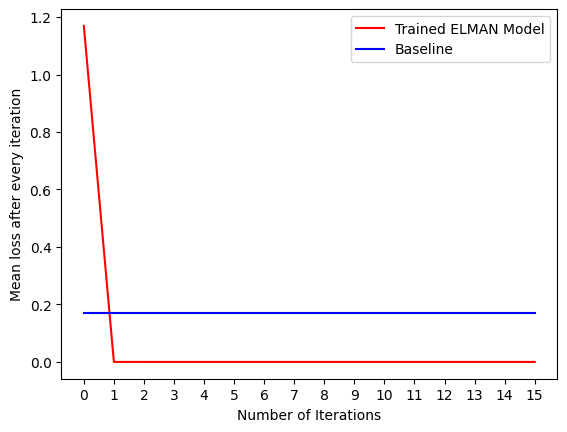

In [9]:
PlotIt(no_of_epochs,ElmanLoss,'ELMAN')

**TESTING**

In [10]:

# N_test -> Number of points for training
N_test=4000
X_test=[]
Y_test=np.empty(shape=(N_test,1))
for i in range(0,N_test):
    x1,y1,size=DataSetCreation(2,9)
    X_test.append(x1)
    Y_test[i]=y1
# Y_test -> Predicted values 
Y_test=torch.from_numpy(Y_test)


z_test=0
for i in range(0,N_test):
    loss =ElmonRNN(X_test[i],Y_test[i],X_test[i].shape,3,WXH,WHH,B,V,B2)
    z_test+=loss.detach()

print(f"Testing loss for Elman RNN is {z_test[0][0]/N_test}")
    

Testing loss for Elman RNN is 0.02247795855350368


# LSTM RNN

In [11]:
def ForgetGate(WHH,WXH,B,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)+B
    return torch.sigmoid(z)

def InputGate(WHH,WXH,B,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)+B
    return torch.sigmoid(z)

def C_hat(WHH,WXH,B,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)+B
    return torch.tanh(z)

def OutputGate(WHH,WXH,B,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)+B
    return torch.sigmoid(z)

In [12]:
def ElementWiseMul(A,B,size):
    return torch.mul(A,B)
    
def LSTMForward(X,y,size,Hsize,WXH_f,WHH_f,B_f,WXH_i,WHH_i,B_i,WXH_o,WHH_o,B_o,WXH_c,WHH_c,B_c,V,B2):
    lenOfInput=X.shape[0]
    H = torch.zeros((Hsize,1))
    C_t = torch.zeros((Hsize,1))
    for i in range(lenOfInput):
        f_t = ForgetGate(WHH_f,WXH_f,B_f,H,torch.FloatTensor(X[i]))
        i_t = InputGate(WHH_i,WXH_i,B_i,H,torch.FloatTensor(X[i]))
        C_t_hat = C_hat(WHH_c,WXH_c,B_c,H,torch.FloatTensor(X[i]))
        C_t = ElementWiseMul(f_t,C_t,Hsize)+ElementWiseMul(i_t,C_t_hat,Hsize)
        o_t = OutputGate(WHH_c,WXH_c,B_c,H,torch.FloatTensor(X[i]))
        H = ElementWiseMul(o_t,torch.tanh(C_t),Hsize)
    predLabel = torch.relu(torch.matmul(V,H)[0][0]+B2)
    loss = (predLabel-y)*(predLabel-y)
    return loss

In [13]:
no_of_epochs = 10

Hsize=3

# forget gate params
WXH_f=torch.rand((Hsize,2),requires_grad=True)
WHH_f=torch.rand((Hsize,Hsize),requires_grad=True)
B_f=torch.zeros((Hsize,1),requires_grad=True)


# input gate params
WXH_i=torch.rand((Hsize,2),requires_grad=True)
WHH_i=torch.rand((Hsize,Hsize),requires_grad=True)
B_i=torch.zeros((Hsize,1),requires_grad=True)


# output gate params
WXH_o=torch.rand((Hsize,2),requires_grad=True)
WHH_o=torch.rand((Hsize,Hsize),requires_grad=True)
B_o=torch.zeros((Hsize,1),requires_grad=True)


# c hat params
WXH_c=torch.rand((Hsize,2),requires_grad=True)
WHH_c=torch.rand((Hsize,Hsize),requires_grad=True)
B_c=torch.zeros((Hsize,1),requires_grad=True)

# final params
V=torch.rand((1,Hsize),requires_grad=True)
B2=torch.zeros((1,1),requires_grad=True)


paramsLSTM=[WXH_f,WHH_f,B_f, WXH_i,WHH_i,B_i,WXH_o,WHH_o,B_o,WXH_c,WHH_c,B_c,V,B2]
optimizerLSTM = optim.SGD(paramsLSTM, lr=0.01)

LSTMLoss=[]
for i in range(0,N):
        loss =LSTMForward(X[i],Y[i],X[i].shape,3,WXH_f,WHH_f,B_f, WXH_i,WHH_i,B_i,WXH_o,WHH_o,B_o,WXH_c,WHH_c,B_c,V,B2)
        z+=loss.detach()
# adding initial loss to the array ElmanLoss
LSTMLoss.append(z/N)
print(f'Initially, Loss is {LSTMLoss}')

for j in range(no_of_epochs):
    loss1 = 0
    z=0
    for i in range(0,N):
        loss1 =LSTMForward(X[i],Y[i],X[i].shape,3,WXH_f,WHH_f,B_f, WXH_i,WHH_i,B_i,WXH_o,WHH_o,B_o,WXH_c,WHH_c,B_c,V,B2)
        optimizerLSTM.zero_grad()
        loss1.backward()
        optimizerLSTM.step()
        z+=loss1.detach()
    z=z/N
    LSTMLoss.append(z)
    print(f"At Epoch {j+1}, the total training dataset loss is {z}")


Initially, Loss is [tensor([[0.6060]], dtype=torch.float64)]
At Epoch 1, the total training dataset loss is tensor([[0.0891]], dtype=torch.float64)
At Epoch 2, the total training dataset loss is tensor([[0.0303]], dtype=torch.float64)
At Epoch 3, the total training dataset loss is tensor([[0.0110]], dtype=torch.float64)
At Epoch 4, the total training dataset loss is tensor([[0.0052]], dtype=torch.float64)
At Epoch 5, the total training dataset loss is tensor([[0.0028]], dtype=torch.float64)
At Epoch 6, the total training dataset loss is tensor([[0.0018]], dtype=torch.float64)
At Epoch 7, the total training dataset loss is tensor([[0.0015]], dtype=torch.float64)
At Epoch 8, the total training dataset loss is tensor([[0.0013]], dtype=torch.float64)
At Epoch 9, the total training dataset loss is tensor([[0.0012]], dtype=torch.float64)
At Epoch 10, the total training dataset loss is tensor([[0.0011]], dtype=torch.float64)


*Comparing loss with BaseLine*

C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y_axis = np.array(points)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_axis = np.array(points)


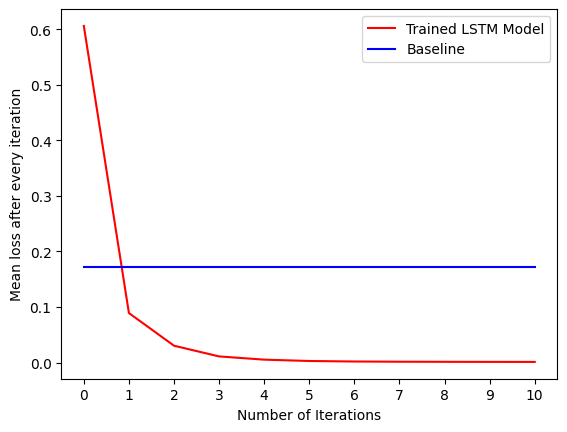

In [14]:
PlotIt(no_of_epochs,LSTMLoss,'LSTM')

**TESTING**

In [15]:

N_test=2000
X_test=[]
Y_test=np.empty(shape=(N_test,1))
for i in range(0,N_test):
    x1,y1,size=DataSetCreation(2,9)
    X_test.append(x1)
    Y_test[i]=y1


Y_test=torch.from_numpy(Y_test)


z_test=0
for i in range(0,N_test):
    loss =LSTMForward(X[i],Y[i],X[i].shape,3,WXH_f,WHH_f,B_f, WXH_i,WHH_i,B_i,WXH_o,WHH_o,B_o,WXH_c,WHH_c,B_c,V,B2)
    z_test+=loss.detach()

print(f"Testing loss of LSTM is {z_test[0][0]/N_test}")
    

Testing loss of LSTM is 0.0010039729046324502


**GRU RNN**

In [16]:
def ResetGate(WHH,WXH,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)
    return torch.sigmoid(z)

def UpdateGate(WHH,WXH,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)
    return torch.sigmoid(z)

def H_hat(WHH,WXH,H,X):
    z=torch.matmul(WXH,X).reshape(3,1)+torch.matmul(WHH,H).reshape(3,1)
    return torch.tanh(z)

def GRUForward(X,y,size,Hsize,WXH_z,WHH_z,WXH_r,WHH_r,WXH_o,WHH_o,V,B2):
    len_=X.shape[0]
    H=torch.zeros((Hsize,1))
    for i in range(len_):
        z_t=ResetGate(WHH_z,WXH_z,H,torch.FloatTensor(X[i]))
        r_t=UpdateGate(WHH_i,WXH_i,H,torch.FloatTensor(X[i]))
        H_t_hat=H_hat(WHH_o,WXH_o,ElementWiseMul(r_t,H,Hsize),torch.FloatTensor(X[i]))
        H=H-ElementWiseMul(z_t,H,Hsize)+ElementWiseMul(z_t,H_t_hat,Hsize)
    predLabel=torch.relu(torch.matmul(V,H)[0][0]+B2)
    loss=(predLabel-y)*(predLabel-y)
    return loss


In [17]:
no_of_epochs=10

Hsize=3

# forget gate params
WXH_z=torch.rand((Hsize,2),requires_grad=True)
WHH_z=torch.rand((Hsize,Hsize),requires_grad=True)


# input gate params
WXH_r=torch.rand((Hsize,2),requires_grad=True)
WHH_r=torch.rand((Hsize,Hsize),requires_grad=True)

# output gate params
WXH_o=torch.rand((Hsize,2),requires_grad=True)
WHH_o=torch.rand((Hsize,Hsize),requires_grad=True)

# final params
V=torch.rand((1,Hsize),requires_grad=True)
B2=torch.zeros((1,1),requires_grad=True)


paramsGRU=[WXH_f,WHH_f, WXH_i,WHH_i,WXH_o,WHH_o,V,B2]
optimizerGRU = optim.SGD(paramsGRU, lr=0.05)

GRULoss=[]
for i in range(0,N):
        loss = GRUForward(X[i],Y[i],X[i].shape,3,WXH_z,WHH_z,WXH_r,WHH_r,WXH_o,WHH_o,V,B2)
        z+=loss.detach()
# adding initial loss to the array ElmanLoss
GRULoss.append(z/N)
print(f'Initially, Loss is {GRULoss}')



for j in range(no_of_epochs):
    loss2 = 0
    z=0
    for i in range(0,N):
        loss2 =GRUForward(X[i],Y[i],X[i].shape,3,WXH_z,WHH_z,WXH_r,WHH_r,WXH_o,WHH_o,V,B2)
        optimizerGRU.zero_grad()
        loss2.backward()
        optimizerGRU.step()
        z+=loss2.detach()
    z=z/N
    GRULoss.append(z)
    print(f"Epoch {j+1}, Loss is {z}")

Initially, Loss is [tensor([[0.1934]], dtype=torch.float64)]
Epoch 1, Loss is tensor([[0.0514]], dtype=torch.float64)
Epoch 2, Loss is tensor([[0.0126]], dtype=torch.float64)
Epoch 3, Loss is tensor([[0.0110]], dtype=torch.float64)
Epoch 4, Loss is tensor([[0.0103]], dtype=torch.float64)
Epoch 5, Loss is tensor([[0.0099]], dtype=torch.float64)
Epoch 6, Loss is tensor([[0.0095]], dtype=torch.float64)
Epoch 7, Loss is tensor([[0.0093]], dtype=torch.float64)
Epoch 8, Loss is tensor([[0.0090]], dtype=torch.float64)
Epoch 9, Loss is tensor([[0.0088]], dtype=torch.float64)
Epoch 10, Loss is tensor([[0.0086]], dtype=torch.float64)


*Comparing loss with BaseLine*

C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y_axis = np.array(points)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15608\1766000109.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_axis = np.array(points)


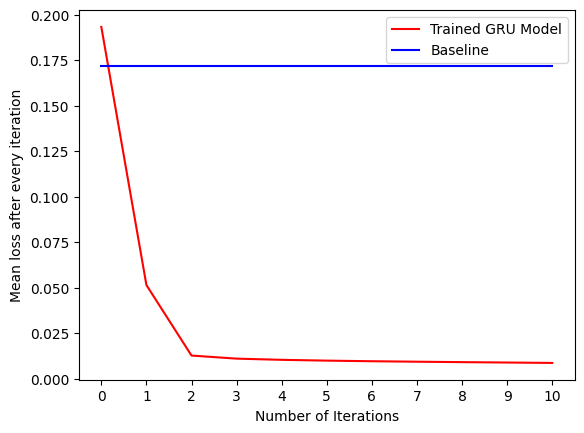

In [18]:
PlotIt(no_of_epochs,GRULoss,'GRU')

In [19]:
#testing
N_test=2000
X_test=[]
Y_test=np.empty(shape=(N_test,1))
for i in range(0,N_test):
    x1,y1,size=DataSetCreation(2,9)
    X_test.append(x1)
    Y_test[i]=y1


Y_test=torch.from_numpy(Y_test)


z_test=0
for i in range(0,N_test):
    loss=GRUForward(X[i],Y[i],X[i].shape,3,WXH_z,WHH_z,WXH_r,WHH_r,WXH_o,WHH_o,V,B2)
    z_test+=loss.detach()

print(f"Testing loss for GRU is {z_test[0][0]/N_test}")    

Testing loss for GRU is 0.004894628859252344


In [20]:

print(f"Testing loss for GRU is {z_test[0][0]/N_test}")

Testing loss for GRU is 0.004894628859252344


In [21]:
def PlotIt(no_of_epochs,points,rnnNAME):
    BaseLineLossY = BaseLineLoss * np.ones([no_of_epochs+1])
    x_axis = np.arange(no_of_epochs+1)
    y_axis = np.array(points)
    plt.plot(x_axis,y_axis,label=f'Trained {rnnNAME} Model',color='red')
    plt.plot(x_axis,BaseLineLossY,label='Baseline',color='blue')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Mean loss after every iteration')
    plt.legend()
    plt.xticks(np.arange(no_of_epochs+1))
    plt.show()